In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
import extract_and_transform as et
X_train,X_test,y_train,y_test,real_df,X,y = et.training_data()

In [3]:
model=Sequential()
model.add(Dense(128,input_dim=8,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [4]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 9ms/step - loss: 5069.1504 - accuracy: 0.0000e+00 - val_loss: 1475.2468 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 550.5876 - accuracy: 0.0000e+00 - val_loss: 221.2134 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 199.8569 - accuracy: 0.0000e+00 - val_loss: 177.2106 - val_accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 149.7410 - accuracy: 0.0000e+00 - val_loss: 160.5582 - val_accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 137.6187 - accuracy: 0.0000e+00 - val_loss: 136.2001 - val_accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 126.0392 - accuracy: 0.0000e+00 - val_loss: 123.6897 - val_accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 120.684

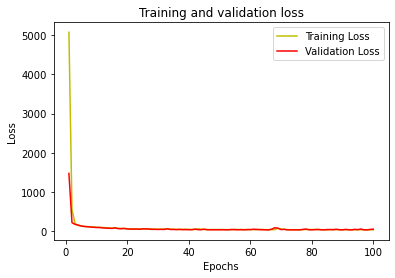

In [5]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
history.history

{'loss': [5069.150390625,
  550.587646484375,
  199.8568572998047,
  149.74099731445312,
  137.61866760253906,
  126.03923797607422,
  120.68482208251953,
  113.33966064453125,
  109.0909194946289,
  105.79683685302734,
  102.27223205566406,
  96.99430847167969,
  91.77490234375,
  87.2459716796875,
  81.57596588134766,
  83.78502655029297,
  78.99148559570312,
  76.16847229003906,
  68.52079772949219,
  68.28460693359375,
  65.16783905029297,
  62.3433837890625,
  62.545475006103516,
  59.9087028503418,
  58.1724853515625,
  58.64257049560547,
  62.10564041137695,
  61.05516815185547,
  53.982666015625,
  54.3343620300293,
  52.816917419433594,
  58.98148727416992,
  66.80962371826172,
  55.00524139404297,
  54.55864715576172,
  49.305328369140625,
  50.193931579589844,
  49.725215911865234,
  55.70138168334961,
  47.888092041015625,
  46.2888298034668,
  49.25431442260742,
  63.67744827270508,
  54.43490982055664,
  48.227115631103516,
  46.89048767089844,
  44.5296745300293,
  46.03

In [7]:
acc = history.history['mae']
val_acc=history.history['val_mae']
plt.plot(epochs,acc,'y',label='Training MAE')
plt.plot(epochs,val_acc,'r',label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'mae'

In [ ]:
predictions=model.predict(X_train[:5])

In [ ]:
print("Predicted values are: ",predictions)
print("Real values: ", y_train[:5])

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
mse_neural, mae_neural

In [ ]:
print(f'Mean squared error from neural net: {mse_neural}')
print(f'Mean absolute error from neural net: ',mae_neural)

In [ ]:
predict=model.predict(X_test)


for x in range(len(y_test)):
    
    print(f"Actual: {y_test[x]}, Predictions: {predict[x]},Error: {(y_test[x]-predict[x])}")



In [8]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)

7/7 - 0s - loss: 48.0085 - accuracy: 0.0000e+00


In [ ]:
model